In [1]:
import sys
sys.path.append('../../')
from localconfig import BASE_PATH,EXPS

import pathlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
np.set_printoptions(threshold=1050)
from pprint import pprint

import maxone_code.data
import maxone_code.fig
from maxone_code.data import Experiment
from maxone_code.artifact.remover import ArtifactAssay

In [2]:
EXP,FILE=(EXPS[1],'searching-9295-9515.raw.h5')
path=pathlib.Path(BASE_PATH).joinpath('data',EXP,'raw',FILE)

In [3]:
from maxone_code.spikedetect import BandPassFilter,HighPassFilter

bpfs = {
    'BPF3000': BandPassFilter(lowcut=250, highcut=3000, order=4),
    'BPF5000': BandPassFilter(lowcut=250, highcut=5000, order=4),
    'BPF7500': BandPassFilter(lowcut=250, highcut=7500, order=4),
    'HPF': HighPassFilter(lowcut=250,order=4),
    }

In [4]:
assay_list={}
for name,bpf in bpfs.items():
    assay=ArtifactAssay(path,lookforframe=100)
    assay.bpf=bpf
    assay.loaddata()
    assay.make_resample()
    assay_list[name]=assay

In [5]:
assay=assay_list['HPF']

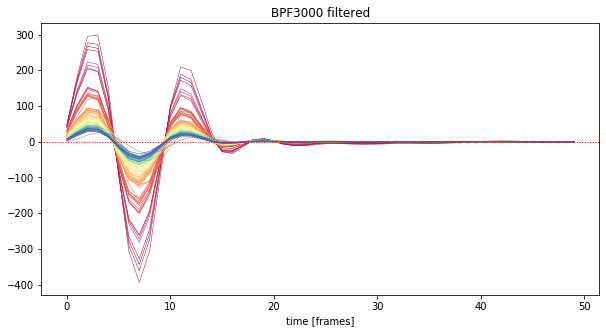

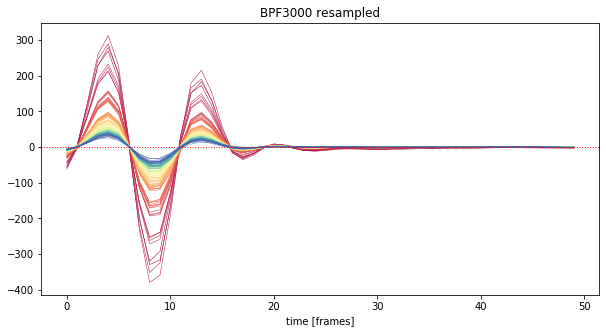

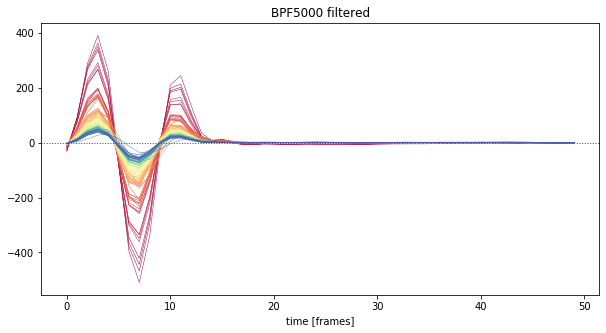

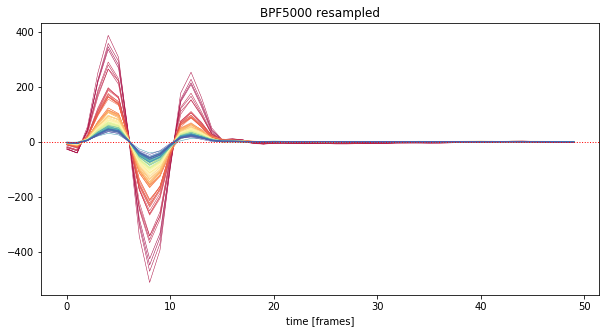

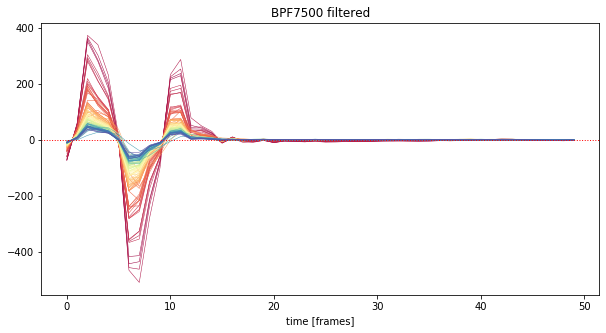

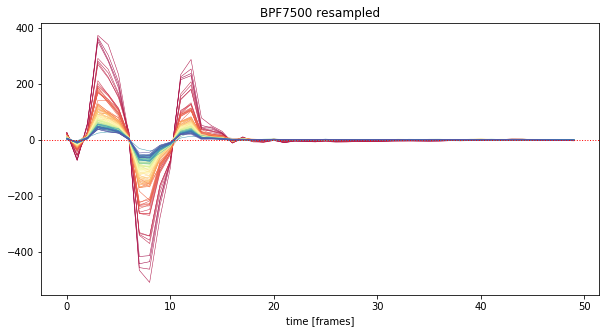

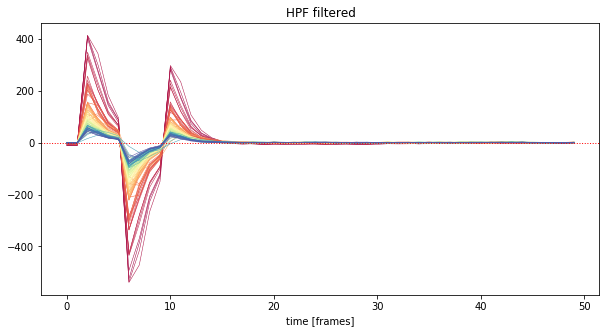

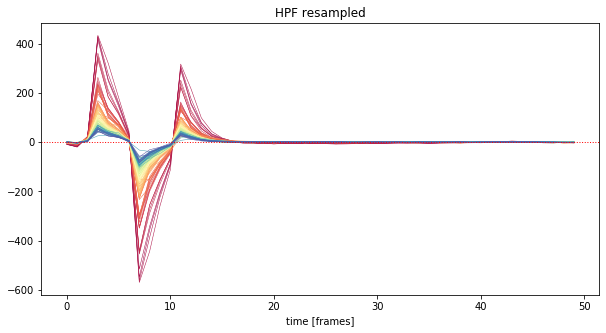

In [6]:
for name,assay in assay_list.items():
    title=name + ' filtered'
    assay.disp_data(assay.data_filtered, trange=[1],frange=np.s_[:50], xids=np.s_[:100:], title=title, draw_xaxis=True)
    title=name + ' resampled'
    assay.disp_data(assay.data_resampled, trange=[1],frange=np.s_[:50], xids=np.s_[:100:], title=title, draw_xaxis=True)

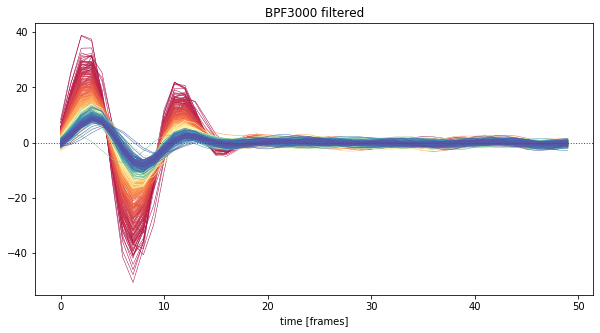

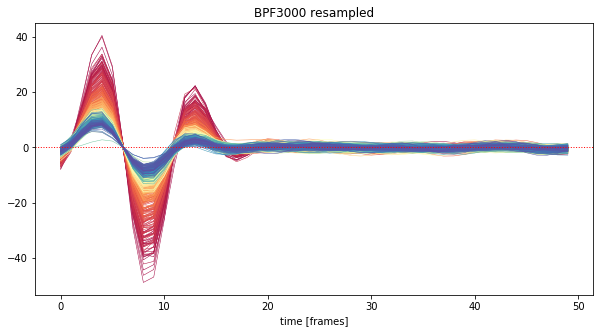

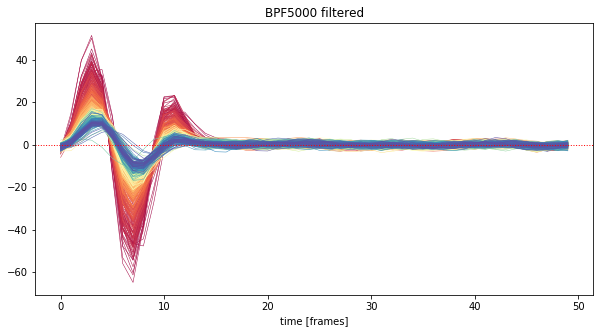

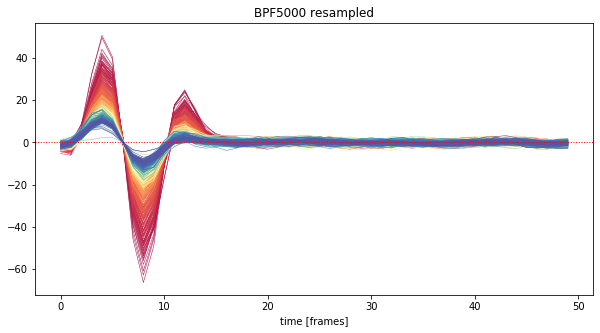

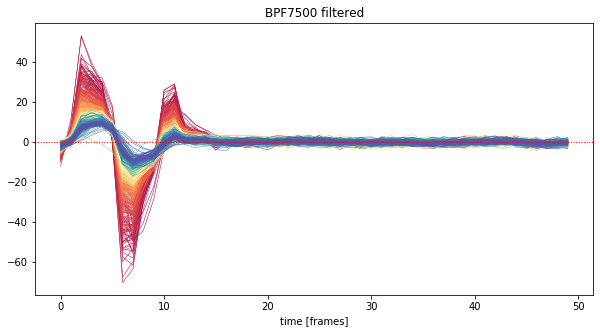

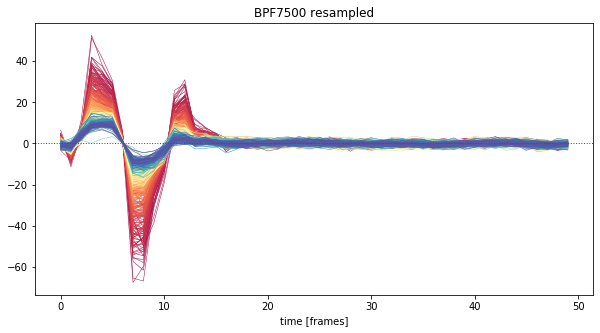

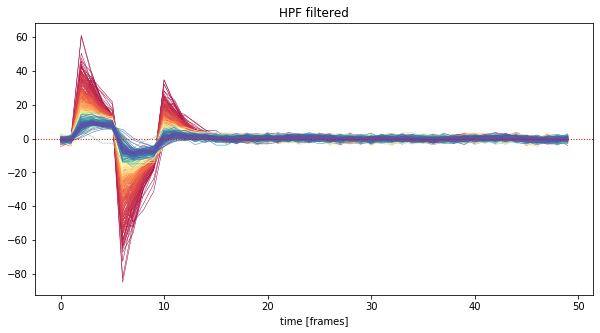

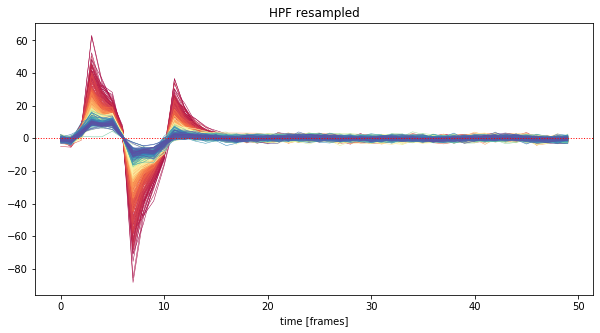

In [7]:
for name,assay in assay_list.items():
    title=name + ' filtered'
    assay.disp_data(assay.data_filtered, trange=[1],frange=np.s_[:50], xids=np.s_[100::], title=title, draw_xaxis=True)
    title=name + ' resampled'
    assay.disp_data(assay.data_resampled, trange=[1],frange=np.s_[:50], xids=np.s_[100::], title=title, draw_xaxis=True)